# CycleGAN

## What is the CycleGAN?

![cyclegan](https://miro.medium.com/max/1400/1*5DG4hHjxAyWTfV1J3mRH_A.png)

Paper : https://arxiv.org/abs/1703.10593


CycleGAN was introduced in the now well-known 2017 paper out of Berkeley, Unpaired Image-to-Image Translation using Cycle-Consistent Adversarial Networks. It was interesting because it did not require paired training data — while an x and y set of images are still required, they do not need to directly correspond to each other. In other words, if you wanted to translate between sketches and photos, you still need to train on a bunch of sketches and a bunch of photos, but the sketches would not need to be of the exact photos in your dataset.



## Dataset : Apple 2 Orange
link : https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/

## About dataset
- Download size: 74.82 MiB
- Split
    - 'testA'  =	266
    - 'testB'  =	248
    - 'trainA' =	995
    - 'trainB' =	1,019

    

![img](https://storage.googleapis.com/tfds-data/visualization/cycle_gan-apple2orange-2.0.0.png)


In [ ]:
from google.colab import auth
auth.authenticate_user()

# 구글 드라이브 mount 
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
cd gdrive/My Drive/Colab Notebooks/

/content/gdrive/My Drive/Colab Notebooks


In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import tensorflow as tf
tf.test.is_gpu_available()

True

In [ ]:
import os
import matplotlib.pyplot as plt

from models.cycleGAN3 import CycleGAN
from utils.loaders import DataLoader

Using TensorFlow backend.


In [ ]:
SECTION = 'paint'
RUN_ID = '0001'
DATA_NAME = 'apple2orange'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])
mode =  'build'

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

# Load Data

In [ ]:
IMAGE_SIZE = 128

In [ ]:
data_loader = DataLoader(dataset_name=DATA_NAME, img_res=(IMAGE_SIZE, IMAGE_SIZE))

# Architecture

In [ ]:
gan = CycleGAN(
    input_dim = (IMAGE_SIZE,IMAGE_SIZE,3)
    ,learning_rate = 0.0012
    , buffer_max_length = 50
    , lambda_validation = 1
    , lambda_reconstr = 10
    , lambda_id = 2
    , generator_type = 'unet'
    , gen_n_filters = 32
    , disc_n_filters = 32
    )

if mode == 'build':
    gan.save(RUN_FOLDER)
else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))
    


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


# Train

In [ ]:
BATCH_SIZE = 1
EPOCHS = 20
PRINT_EVERY_N_BATCHES = 50

TEST_A_FILE = 'n07740461_14740.jpg'
TEST_B_FILE = 'n07749192_4241.jpg'


In [ ]:
gan.train(data_loader
        , run_folder = RUN_FOLDER
        , epochs=EPOCHS
        , test_A_file = TEST_A_FILE
        , test_B_file = TEST_B_FILE
        , batch_size=BATCH_SIZE
        , sample_interval=PRINT_EVERY_N_BATCHES)
        

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


[Epoch 0/20] [Batch 0/995] [D loss: 1.360350, acc:  32%] [G loss: 22.800661, adv: 3.696416, recon: 1.644129, id: 1.331475] time: 0:00:49.305911 


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[Epoch 14/20] [Batch 965/995] [D loss: 0.743665, acc:  51%] [G loss: 6.372585, adv: 1.405308, recon: 0.418923, id: 0.389023] time: 1:33:51.892571 
[Epoch 14/20] [Batch 966/995] [D loss: 1.058059, acc:  38%] [G loss: 7.268313, adv: 2.380422, recon: 0.400611, id: 0.440892] time: 1:33:52.043787 
[Epoch 14/20] [Batch 967/995] [D loss: 0.736900, acc:  62%] [G loss: 7.345347, adv: 1.993693, recon: 0.454414, id: 0.403758] time: 1:33:52.183839 
[Epoch 14/20] [Batch 968/995] [D loss: 0.972258, acc:  38%] [G loss: 5.864865, adv: 1.514052, recon: 0.363194, id: 0.359434] time: 1:33:52.330294 
[Epoch 14/20] [Batch 969/995] [D loss: 0.472858, acc:  76%] [G loss: 6.680713, adv: 1.823853, recon: 0.413724, id: 0.359812] time: 1:33:52.477068 
[Epoch 14/20] [Batch 970/995] [D loss: 0.345623, acc:  91%] [G loss: 5.704977, adv: 0.872803, recon: 0.408101, id: 0.375580] time: 1:33:52.625393 
[Epoch 14/20] [Batch 971/995] [D loss: 0.453612, acc:  79%] [G loss: 4.926663, adv

# Loss visualization

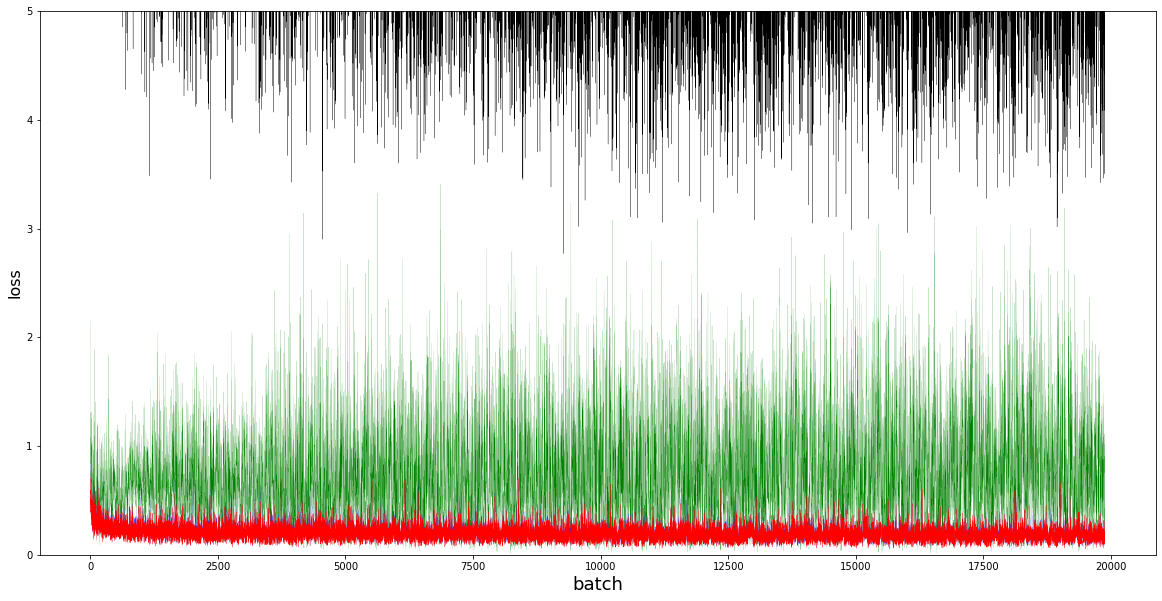

In [ ]:
fig = plt.figure(figsize=(20,10))

plt.plot([x[1] for x in gan.g_losses], color='green', linewidth=0.1) #DISCRIM LOSS
# plt.plot([x[2] for x in gan.g_losses], color='orange', linewidth=0.1)
plt.plot([x[3] for x in gan.g_losses], color='blue', linewidth=0.1) #CYCLE LOSS
# plt.plot([x[4] for x in gan.g_losses], color='orange', linewidth=0.25)
plt.plot([x[5] for x in gan.g_losses], color='red', linewidth=0.25) #ID LOSS
# plt.plot([x[6] for x in gan.g_losses], color='orange', linewidth=0.25)

plt.plot([x[0] for x in gan.g_losses], color='black', linewidth=0.25)

# plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.ylim(0, 5)

plt.show()

# Visualize the results

In [ ]:
from glob import glob

path = '/content/gdrive/My Drive/Colab Notebooks/run/paint/0005_apple2orange/images/'

path_list = glob(os.path.join(path, '*.png'))
print('path list length :', len(path_list))

path list length : 1292


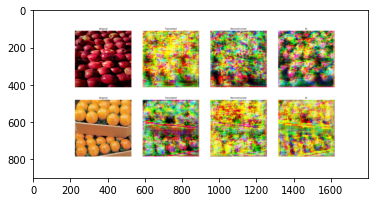

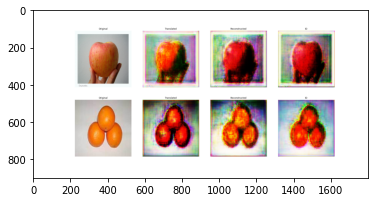

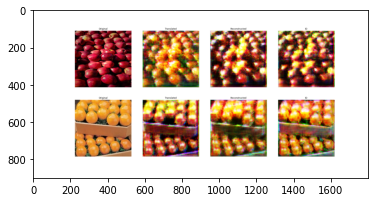

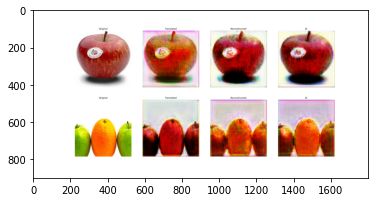

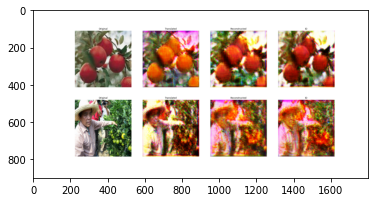

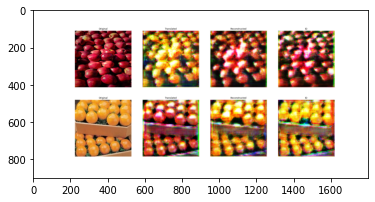

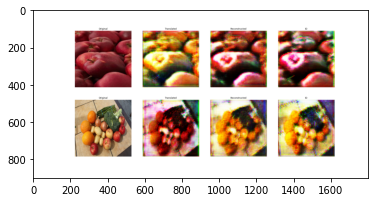

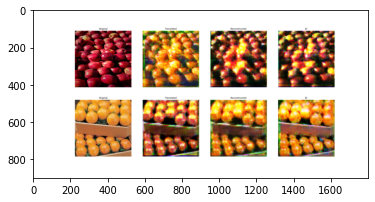

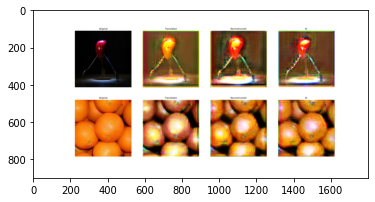

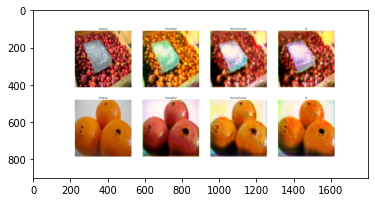

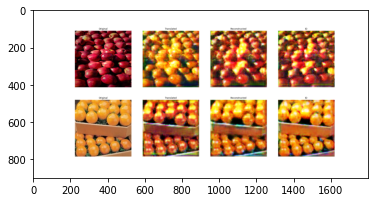

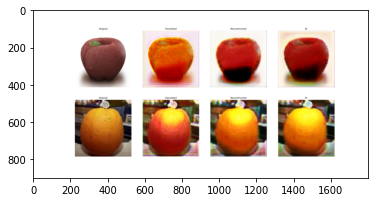

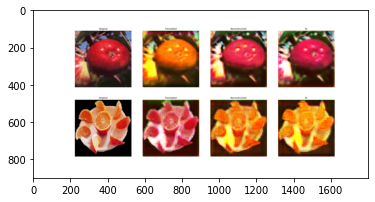

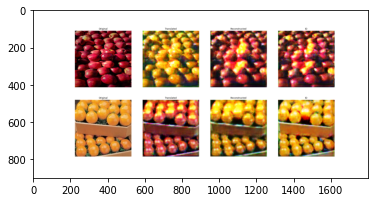

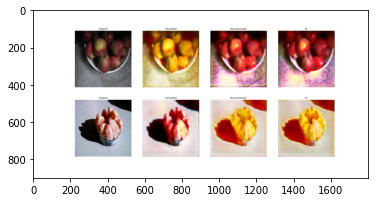

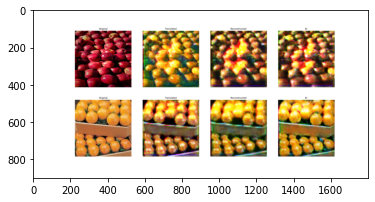

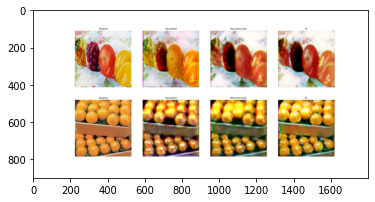

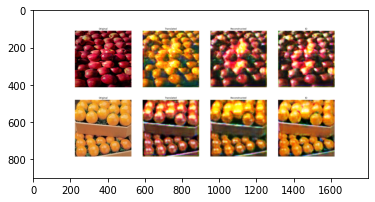

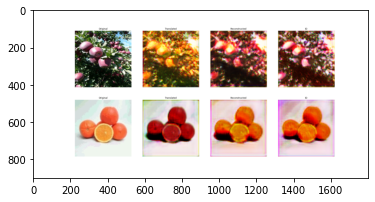

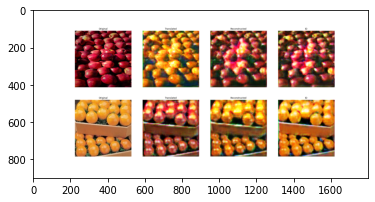

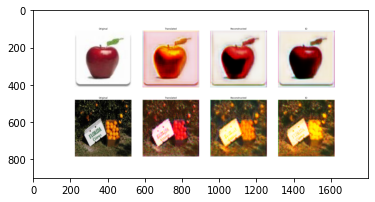

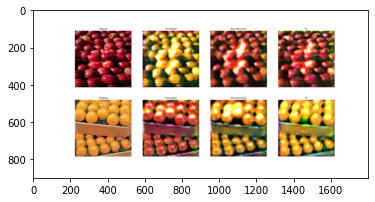

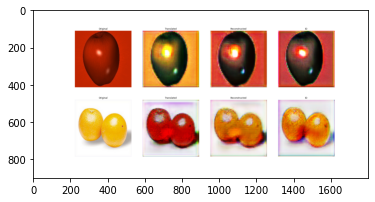

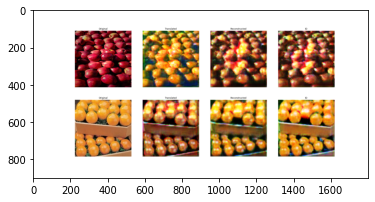

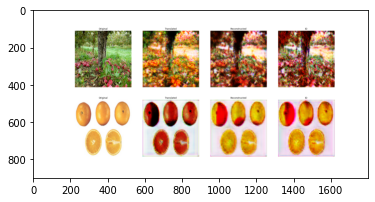

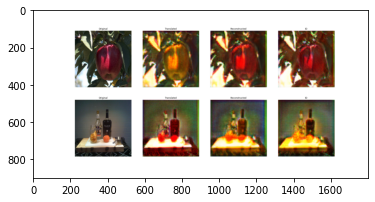

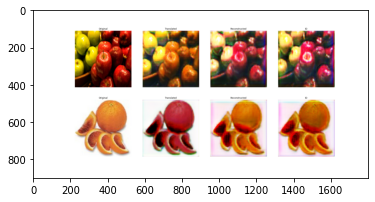

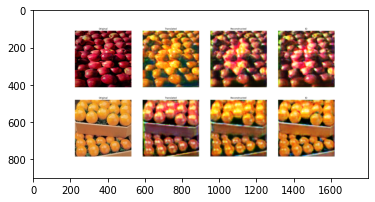

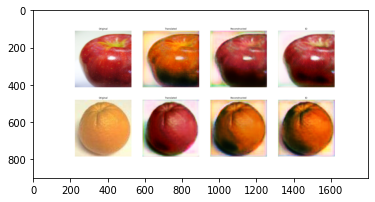

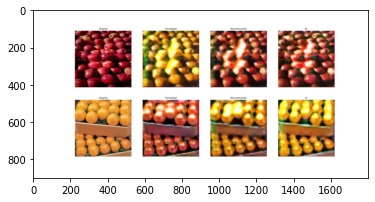

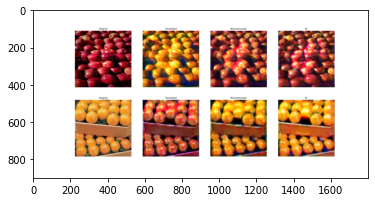

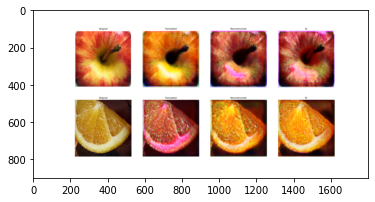

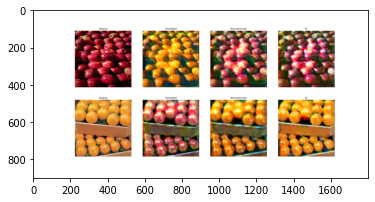

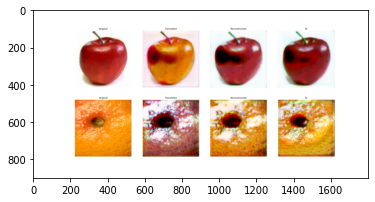

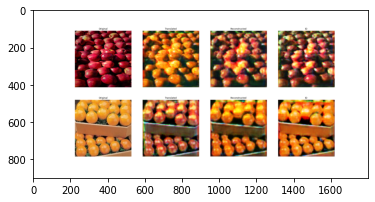

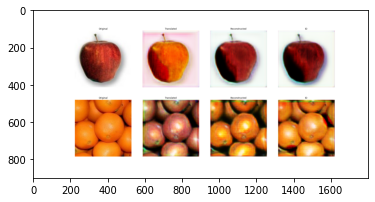

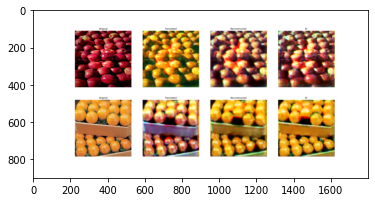

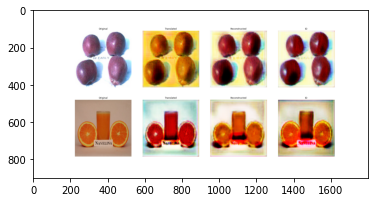

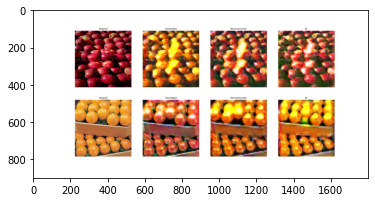

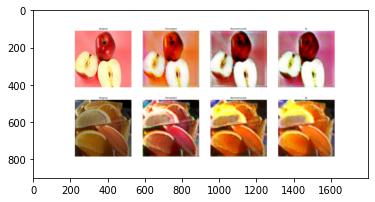

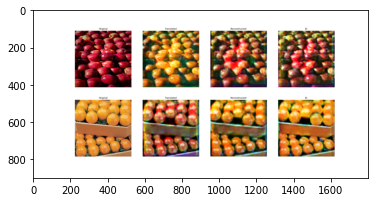

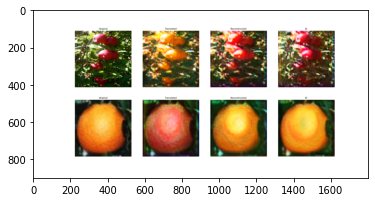

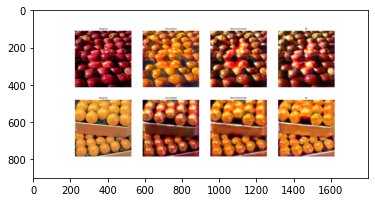

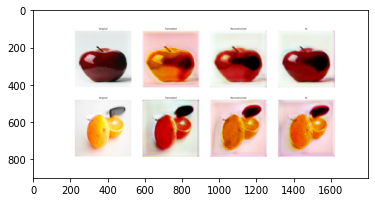

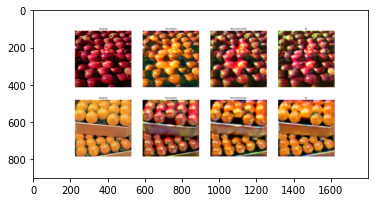

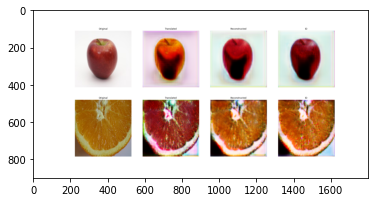

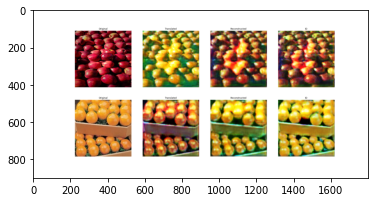

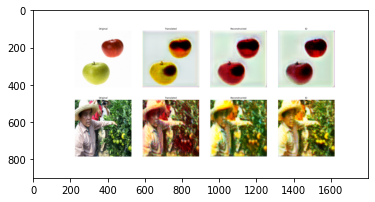

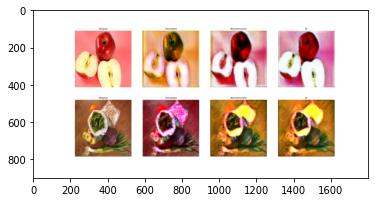

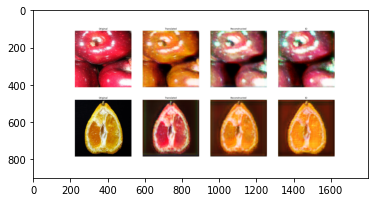

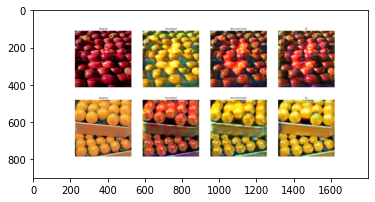

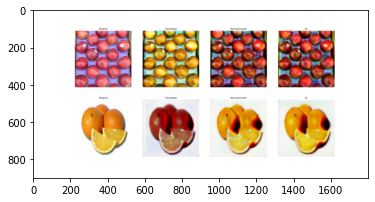

In [ ]:
import cv2
import numpy as np
import random

images = random.choice

for i in path_list:
    img = cv2.imread(i)
    # openCV --> BGR, Matplotlib --> RGB
    b, g, r = cv2.split(img)   # split b,g,r from images
    img = cv2.merge([r,g,b]) # convert b to r and merge

    plt.imshow(img)
    plt.show()

Reference
- https://www.tensorflow.org/datasets/catalog/cycle_gan
- https://towardsdatascience.com/cyclegan-learning-to-translate-images-without-paired-training-data-5b4e93862c8d
- https://opencv-python.readthedocs.io/en/latest/doc/01.imageStart/imageStart.html